In [9]:

# Basic Tools
import numpy as np
import pandas as pd
from datetime import datetime as dt
import sys
import re


# Visualization Tools
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
from PIL import Image
from IPython.display import display
import sweetviz as sv

# import plotly packages 
import plotly.graph_objects as go
import plotly.express as px



#!{sys.executable} -m pip install pandas-profiling
from pandas_profiling import ProfileReport



from sklearn.model_selection import train_test_split



import warnings

import warnings
warnings.filterwarnings( 'ignore' )

In [242]:
data_raw = pd.read_csv('../data/processed/data_processed.csv')

In [243]:
data = data_raw.copy()

# Configurations

In [244]:
# def pandas_settings():
#     pd.options.display.float_format = '{:,.2f}'.format
#     pd.set_option('display.expand_frame_repr', False )
#     pd.set_option('display.max_columns', 35)
#     pd.set_option('display.max_rows', 50)
    

# pandas_settings()

# Analyse Dataset

In [245]:
# profile = ProfileReport(data, minimal=True)
# profile.to_file(output_file="../reports/analyse_fraud.html")

In [246]:

# my_report = sv.analyze(data)
# my_report.show_html() 

In [247]:
data.head()

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
0,1,PAYMENT,"9,839.64",C1231006815,"170,136.00","160,296.36",M1979787155,0.00,0.00,0,0
1,1,PAYMENT,"1,864.28",C1666544295,"21,249.00","19,384.72",M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1,0
4,1,PAYMENT,"11,668.14",C2048537720,"41,554.00","29,885.86",M1230701703,0.00,0.00,0,0


In [248]:
desc = data.describe()
desc = desc.style.background_gradient()
desc

,step,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
count,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000
mean,243.397246,179861.903549,833883.104074,855113.668579,1100701.666520,1224996.398202,0.001291,0.000003
std,142.331971,603858.231463,2888242.673038,2924048.502954,3399180.112994,3674128.942120,0.035905,0.001586
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,156.000000,13389.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,239.000000,74871.940000,14208.000000,0.000000,132705.665000,214661.440000,0.000000,0.000000
75%,335.000000,208721.477500,107315.175000,144258.410000,943036.707500,1111909.250000,0.000000,0.000000
max,743.000000,92445516.640000,59585040.370000,49585040.370000,356015889.350000,356179278.920000,1.000000,1.000000


# change type

In [249]:
map_type = {'PAYMENT': 0,'TRANSFER':1,'CASH_OUT': 2,'DEBIT': 3,'CASH_IN': 4}
data['type'] = data['type'].map(map_type)

In [250]:
def remove_1_letra(df, column_name):
    df[column_name] = df[column_name].str[1:]




In [251]:
remove_1_letra(data, 'name_orig')
remove_1_letra(data, 'name_dest')

In [253]:
data.head()

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
0,1,0,"9,839.64",1231006815,"170,136.00","160,296.36",1979787155,0.00,0.00,0,0
1,1,0,"1,864.28",1666544295,"21,249.00","19,384.72",2044282225,0.00,0.00,0,0
2,1,1,181.00,1305486145,181.00,0.00,553264065,0.00,0.00,1,0
3,1,2,181.00,840083671,181.00,0.00,38997010,"21,182.00",0.00,1,0
4,1,0,"11,668.14",2048537720,"41,554.00","29,885.86",1230701703,0.00,0.00,0,0


In [ ]:
# s.str.slice(start=0, stop=5, step=3)
# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.slice.html
# mostrar valores unico da inicial
data['name_orig'].str[0:1].unique()

In [215]:
data[data['amount'] < 0.10]

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
1673434,158,0,0.0600,C1836545979,0.0000,0.0000,M711077292,0.0000,0.0000,0,0
2359430,190,0,0.0200,C344473063,"33,192.9700","33,192.9500",M646412904,0.0000,0.0000,0,0
2359953,190,0,0.0700,C1814144923,"11,788.1300","11,788.0600",M28752575,0.0000,0.0000,0,0
2736447,212,2,0.0000,C1510987794,0.0000,0.0000,C1696624817,0.0000,0.0000,1,0
2799608,217,0,0.0300,C807337950,"205,196.0000","205,195.9700",M1035971031,0.0000,0.0000,0,0
3027913,233,0,0.0200,C1371059152,0.0000,0.0000,M1506318282,0.0000,0.0000,0,0
3247298,250,2,0.0000,C521393327,0.0000,0.0000,C480398193,0.0000,0.0000,1,0
3760289,279,2,0.0000,C539112012,0.0000,0.0000,C1106468520,"538,547.6300","538,547.6300",1,0
4077303,301,0,0.0200,C421116740,0.0000,0.0000,M410442874,0.0000,0.0000,0,0
4736180,332,2,0.0100,C1496340830,0.0000,0.0000,C554562342,"262,792.7900","262,792.8000",0,0


# Filter

In [216]:
condicao1 = (data['oldbalance_org'] - data['newbalance_orig'] == data['amount'])
condicao2 = (data['newbalance_dest'] - data['oldbalance_dest'] == data['amount'])



dados_filtrados_cliente = data[condicao1]
is_fraud_cliente = dados_filtrados_correto['is_fraud'].sum()



dados_filtrados_destino = data[condicao2]
is_fraud_destino = dados_filtrados_errado['is_fraud'].sum()



dados_filtrados_merge = data[condicao1 & condicao2]
is_fraud_merge = dados_filtrados_merge['is_fraud'].sum()




print(f'Tamanho do dataset: {data.shape[0]}')

print('-------------------------------------------')

print('Dados que tem saldo inicial antes da transação que esteja correto com saldo depois da transação -  cliente')
print(f'Quantidade de linhas: {dados_filtrados_cliente.shape[0]}')
print(f'Quantidade de fraude: {is_fraud_cliente}')



print('-------------------------------------------')

print('Dados que tem saldo inicial antes da transação que esteja correto com saldo depois da transação - destino')
print(f'Quantidade de linhas: {dados_filtrados_destino.shape[0]}')
print(f'Quantidade de fraude: {is_fraud_destino}')

print('-------------------------------------------')


print(f'Quantidade de linhas do filtro com base as condições: \
      {dados_filtrados_errado.shape[0] + dados_filtrados_correto.shape[0] }')

print('-------------------------------------------')

print('Dados que tem saldo inicial antes da transação que esteja correto com saldo depois da transação cliente e  destino')
print(f'Quantidade de linhas: {dados_filtrados_merge.shape[0]}')
print(f'Quantidade de fraude: {is_fraud_merge}')

print('-------------------------------------------')



Tamanho do dataset: 6362620
-------------------------------------------
Dados que tem saldo inicial antes da transação que esteja correto com saldo depois da transação -  cliente
Quantidade de linhas: 440511
Quantidade de fraude: 8144
-------------------------------------------
Dados que tem saldo inicial antes da transação que esteja correto com saldo depois da transação - destino
Quantidade de linhas: 760360
Quantidade de fraude: 2171
-------------------------------------------
Quantidade de linhas do filtro com base as condições:       1200871
-------------------------------------------
Dados que tem saldo inicial antes da transação que esteja correto com saldo depois da transação cliente e  destino
Quantidade de linhas: 60035
Quantidade de fraude: 2161
-------------------------------------------


In [217]:
# check se tem linhas com somente letra na coluna name_orig.
data.loc[data['name_orig'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'name_orig'].unique()

array([], dtype=object)

In [218]:
# # identficacao: mostrar todas as linhas que tem letra e numero
# df_name_orig = data.loc[data['name_orig'].apply( lambda x: bool( re.search( '[^0-9]+', x ) ) ), :]
# df_name_orig.head(20)

In [219]:
# s.str.slice(start=0, stop=5, step=3)
# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.slice.html
# mostrar valores unico da inicial
data['name_orig'].str[0:1].unique()

array(['C'], dtype=object)

In [220]:
# mostrar a letra inicial do name_dest
# M (Comerciantes).
data['name_dest'].str[0:1].unique()

array(['M', 'C'], dtype=object)

In [221]:
# não temos o mesmo name_orig idetico com name_dest
teste = data['name_orig'] == data['name_dest']
data[teste]

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud


In [222]:
num_attributes = data.select_dtypes(include=['int64', 'float64'])
cat_attributes = data.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [223]:
num_attributes

,step,type,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
0,1,0,"9,839.6400","170,136.0000","160,296.3600",0.0000,0.0000,0,0
1,1,0,"1,864.2800","21,249.0000","19,384.7200",0.0000,0.0000,0,0
2,1,1,181.0000,181.0000,0.0000,0.0000,0.0000,1,0
3,1,2,181.0000,181.0000,0.0000,"21,182.0000",0.0000,1,0
4,1,0,"11,668.1400","41,554.0000","29,885.8600",0.0000,0.0000,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,2,"339,682.1300","339,682.1300",0.0000,0.0000,"339,682.1300",1,0
6362616,743,1,"6,311,409.2800","6,311,409.2800",0.0000,0.0000,0.0000,1,0
6362617,743,2,"6,311,409.2800","6,311,409.2800",0.0000,"68,488.8400","6,379,898.1100",1,0
6362618,743,1,"850,002.5200","850,002.5200",0.0000,0.0000,0.0000,1,0


In [224]:
cat_attributes

,name_orig,name_dest
0,C1231006815,M1979787155
1,C1666544295,M2044282225
2,C1305486145,C553264065
3,C840083671,C38997010
4,C2048537720,M1230701703
...,...,...
6362615,C786484425,C776919290
6362616,C1529008245,C1881841831
6362617,C1162922333,C1365125890
6362618,C1685995037,C2080388513


# Numerical Variables

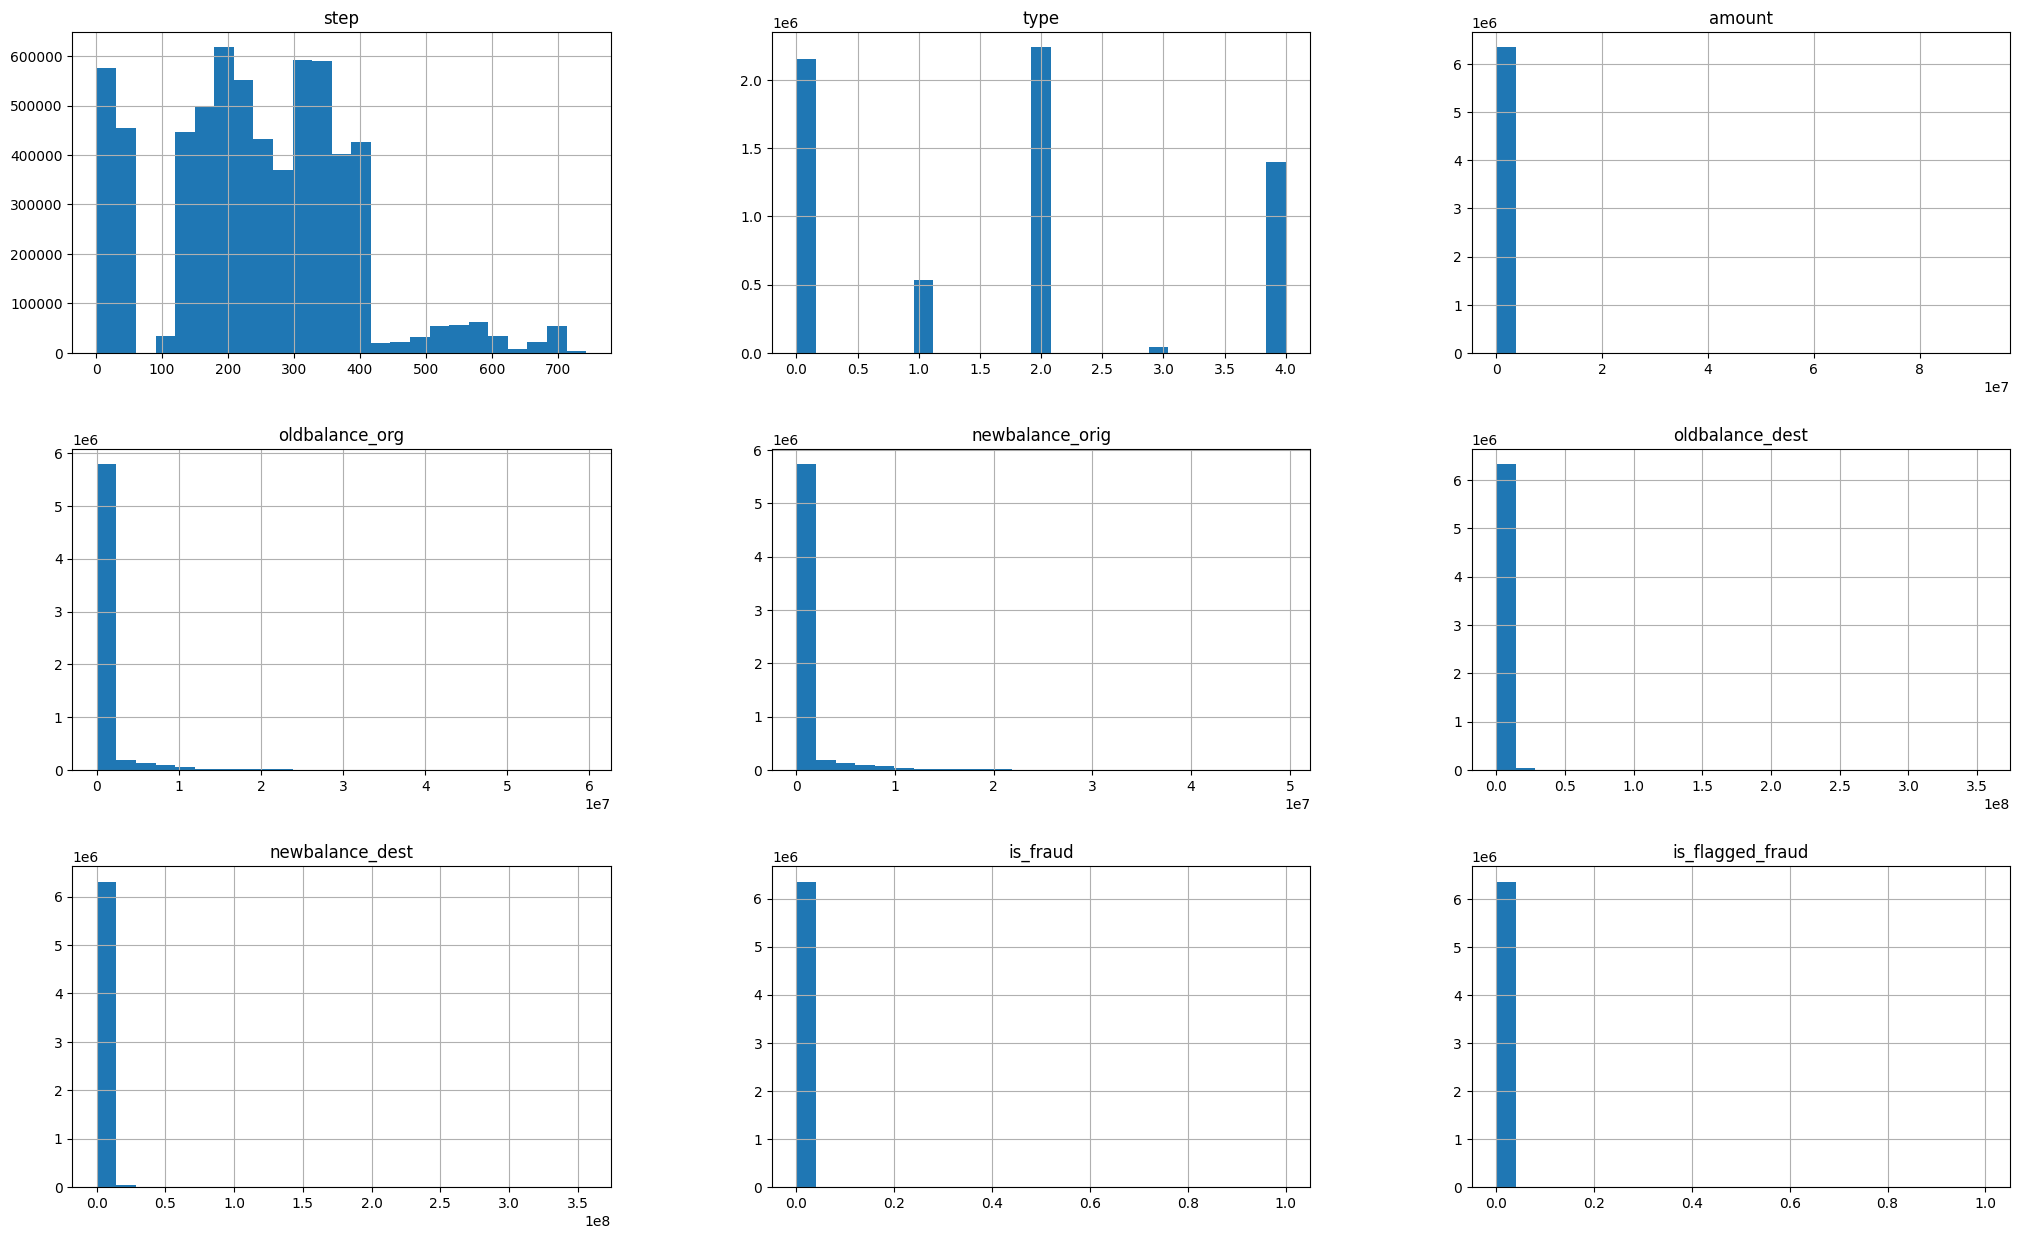

In [225]:
num_attributes.hist(bins=25, figsize=(25,15));

# Analise Univariada

## is_fraud

# Analise Bivariada

# step

<Axes: xlabel='step', ylabel='amount'>

Error in callback <function _draw_all_if_interactive at 0x0000027D84A44040> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000027D84A60310> (for post_execute):



KeyboardInterrupt



# type

In [227]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'type', y = 'amount', data = data, palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()


KeyboardInterrupt



Error in callback <function flush_figures at 0x0000027D84A60310> (for post_execute):



KeyboardInterrupt



# amount

In [ ]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'type', y = 'amount', data = train_data, palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()

# name_orig

# oldbalance_org

# newbalance_orig

# name_dest

# oldbalance_dest

# newbalance_dest

# is_flagged_fraud

# Multivariated Analysis

In [11]:
corr = data.corr(method='pearson')

column_order = ['isFraud'] + [col for col in corr.columns if col != 'isFraud']
corr = corr.reindex(columns=column_order, index=column_order)

plt.figure(figsize=(24, 12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: 'PAYMENT'

In [ ]:
sns.kdeplot(x='engine_cc', data=cars, hue='fuel')